In [1]:
# import packges
import numpy as np
import pandas as pd


In [2]:
# ! python associator.py -a A -t kaggle -s 0.01 -c 0.01

data = pd.read_csv("results/kaggle_Apriori.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,soup ==> mineral water,0.46
1,olive oil ==> mineral water,0.42
2,ground beef ==> mineral water,0.42
3,salmon ==> mineral water,0.40
4,cereals ==> mineral water,0.40
5,ground beef ==> spaghetti,0.40
6,cooking oil ==> mineral water,0.39
7,red wine ==> mineral water,0.39
8,chicken ==> mineral water,0.38
9,frozen vegetables ==> mineral water,0.37


In [3]:
! python associator.py -a F -t kaggle -s 0.01 -c 0.01

data = pd.read_csv("results/kaggle_FPGrowth.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:10]

nset({'mineral water', 'spaghetti'}) conf: 0.14285714285714285
frozenset({'mineral water'}) --> frozenset({'olive oil'}) conf: 0.125
frozenset({'olive oil'}) --> frozenset({'mineral water'}) conf: 0.4285714285714285
frozenset({'shrimp'}) --> frozenset({'tomatoes'}) conf: 0.14285714285714285
frozenset({'tomatoes'}) --> frozenset({'shrimp'}) conf: 0.14285714285714285
frozenset({'ground beef'}) --> frozenset({'tomatoes'}) conf: 0.09999999999999999
frozenset({'tomatoes'}) --> frozenset({'ground beef'}) conf: 0.14285714285714285
frozenset({'tomatoes'}) --> frozenset({'french fries'}) conf: 0.14285714285714285
frozenset({'french fries'}) --> frozenset({'tomatoes'}) conf: 0.058823529411764705
frozenset({'tomatoes'}) --> frozenset({'eggs'}) conf: 0.14285714285714285
frozenset({'eggs'}) --> frozenset({'tomatoes'}) conf: 0.05555555555555556
frozenset({'green tea'}) --> frozenset({'tomatoes'}) conf: 0.07692307692307693
frozenset({'tomatoes'}) --> frozenset({'green tea'}) conf: 0.14285714285714285

,Rule,Confidence
0,salmon ==> mineral water,0.50
1,olive oil ==> mineral water,0.43
2,soup ==> mineral water,0.40
3,soup ==> milk,0.40
4,honey ==> mineral water,0.40
5,herb & pepper ==> spaghetti,0.40
6,herb & pepper ==> mineral water,0.40
7,herb & pepper ==> ground beef,0.40
8,ground beef ==> spaghetti,0.40
9,ground beef ==> mineral water,0.40


In [4]:
# ! python associator.py -a A -t ibm -s 0.01 -c 0.01

data = pd.read_csv("results/ibm_Apriori.csv", sep=",", header=None, names=["Rule", "Confidence"])
data[:50]

,Rule,Confidence
0,28 ==> 14,0.26
1,91 ==> 67,0.22
2,15 ==> 56,0.21
3,26 ==> 14,0.21
4,99 ==> 14,0.21
5,110 ==> 67,0.20
6,49 ==> 34,0.20
7,67 ==> 14,0.20
8,116 ==> 56,0.20
9,111 ==> 56,0.19


23461914 elapsed second(s)
0.491 0.111 0.010805368423461914
0.491 0.106
generate_rules:time 0.01156759262084961 elapsed second(s)
0.491 0.106 0.01156759262084961
0.491 0.101
generate_rules:time 0.010879039764404297 elapsed second(s)
0.491 0.101 0.010879039764404297
0.491 0.096
generate_rules:time 0.011216163635253906 elapsed second(s)
0.491 0.096 0.011216163635253906
0.491 0.091
generate_rules:time 0.011141777038574219 elapsed second(s)
0.491 0.091 0.011141777038574219
0.491 0.08600000000000001
generate_rules:time 0.0779416561126709 elapsed second(s)
0.491 0.08600000000000001 0.0779416561126709
0.491 0.081
generate_rules:time 0.009224891662597656 elapsed second(s)
0.491 0.081 0.009224891662597656
0.491 0.076
generate_rules:time 0.012000083923339844 elapsed second(s)
0.491 0.076 0.012000083923339844
0.491 0.07100000000000001
generate_rules:time 0.011661291122436523 elapsed second(s)
0.491 0.07100000000000001 0.011661291122436523
0.491 0.066
generate_rules:time 0.009931802749633789 elaps

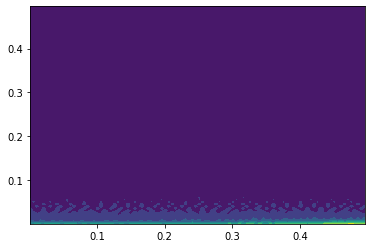

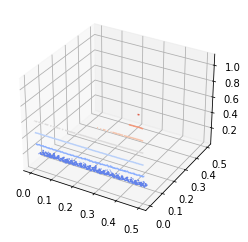

In [3]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

from associator import Associator
from algorithm.fpgrowth import FPGrowth
from dataset_helper.dataset_loader import DataLoader

associator = Associator()
algorithm = FPGrowth()
data = DataLoader.load_kaggle_data()

ss = np.arange(0.001, 0.5, 0.005)
cc = np.arange(0.001, 0.5, 0.005)

ti = []
for s in list(ss):
    tj = []
    for c in list(cc)[::-1]:
        print(s, c)
        _, z = associator.generate_rules(algorithm, data, s, c)
        print(s, c, z)        
        tj.append(z)
    ti.append(tj)

z = np.array(ti)

h = plt.contourf(ss, cc, z)
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot contour curves
cset = ax.contour(ss, cc, z, cmap=cm.coolwarm)

plt.show()

c394f0>
generate_rules:time 0.20856118202209473 elapsed second(s)
0.095 0.085 0.20856118202209473
generate_rules:time 0.2043914794921875 elapsed second(s)
0.095 0.083 0.2043914794921875
generate_rules:time 0.20649933815002441 elapsed second(s)
0.095 0.081 0.20649933815002441
generate_rules:time 0.20893073081970215 elapsed second(s)
0.095 0.079 0.20893073081970215
generate_rules:time 0.21734237670898438 elapsed second(s)
0.095 0.07700000000000001 0.21734237670898438
generate_rules:time 0.20366477966308594 elapsed second(s)
0.095 0.07500000000000001 0.20366477966308594
generate_rules:time 0.21622610092163086 elapsed second(s)
0.095 0.07300000000000001 0.21622610092163086
generate_rules:time 0.21935200691223145 elapsed second(s)
0.095 0.07100000000000001 0.21935200691223145
generate_rules:time 0.27604150772094727 elapsed second(s)
0.095 0.069 0.27604150772094727
generate_rules:time 0.2041018009185791 elapsed second(s)
0.095 0.067 0.2041018009185791
generate_rules:time 0.20604658126831055 

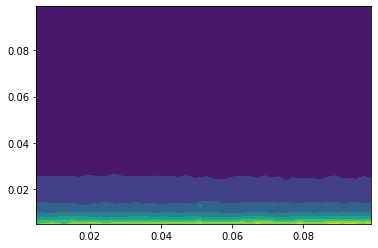

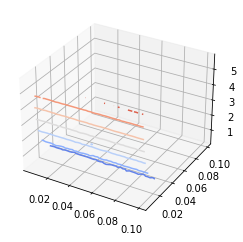

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

from associator import Associator
from algorithm.apriori import Apriori
from dataset_helper.dataset_loader import DataLoader

associator = Associator()
algorithm = Apriori()
data = DataLoader.load_kaggle_data()

ss = np.arange(0.005, 0.1, 0.002)
cc = np.arange(0.005, 0.1, 0.002)

ti = []
for s in list(ss):
    tj = []
    for c in list(cc)[::-1]:
        _, z = associator.generate_rules(algorithm, data, s, c)
        tj.append(z)
        print(s, c, z)
    ti.append(tj)

z = np.array(ti)

h = plt.contourf(ss, cc, z)
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot contour curves
cset = ax.contour(ss, cc, z, cmap=cm.coolwarm)

plt.show()